<a href="https://colab.research.google.com/github/Rogerio-mack/Analise-de-Dados/blob/main/EDA_T4_Pandas_Selecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Dataframes: Seleção de Dados</font></h1>
<hr>

# Recursos

Os recursos abaixo podem ser úteis para você aprender e empregar o **Pandas**.

> [Pandas](https://pandas.pydata.org/)

> [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) 







# Selecionando Sub Conjuntos de Dados no Pandas

Na trilha anterior você aprendeu como obter dados com o Pandas, acessar características básicas de um DataFrame, sumarizar estatísticas dos dados, e selecionar e alterar dados de uma coluna como `pd.Series` do Pandas.

Aqui vamos continuar e aprender como selecionar Sub Conjuntos de Dados de interesse em um DataFrame. Como vimos na trilha anterior, seleções dos dados são bastante importantes pois você nem sempre estará interessado em todos os dados. Por exemplo você pode ter dados de produção de várias unidades de uma fábrica, mas estar interessado somente em dados das unidades de São Paulo (seleção de linhas ou casos). Ou você pode ter dados de vendas com diversas informações dos produtos (cor, modelo etc.) e dos clientes (nome, CPF etc.) e querer apenas dados de peso e dimensões do produto, e da origem e destino da compra para analisar os preços de frete (seleção de colunas ou atributos). Mais frequentemente ainda você vai realizar as duas seleções criando *slices* dos dados.






# Seleção de Colunas, Seleção de Linhas e de Linhas e Colunas

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" width=320, align="center">
<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" width=320, align="center">
<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" width=320, align="center">



# Import da biblioteca

In [ ]:
import pandas as pd
import numpy as np

# Acessando os Dados

Vamos empregar o mesmo conjunto exemplo de dados da trilha anterior e explorar alguns casos de seleção.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/tips.csv') 

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Selecionando UMA COLUNA (= pd.Series)

Vamos recordar como selecionar uma coluna de dados como uma Série de dados do Pandas. A sintaxe é a seguinte:

```
df.nome_coluna

df [ 'nome_coluna' ]
```

A primeira é mais simples, mas a segunda forma permite a seleção de dados com nomes de colunas com caracteres especiais, brancos ou nomes reservados (**experimente selecionar** `df.size`). 

In [ ]:
valores_de_tip = df.tip
print( type( valores_de_tip ) )
print( valores_de_tip )


<class 'pandas.core.series.Series'>
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [ ]:
print( df.tip.mean(), df.tip.sum(), df.tip.std() )

2.9982786885245902 731.5799999999999 1.3836381890011826


In [ ]:
df['tip'].mean()

2.9982786885245902

Selecionada uma Série você poderá obter quaisquer informações desse conjunto de dados ou mesmo exibi-lo em um gráfico como veremos nas próximas trilhas.

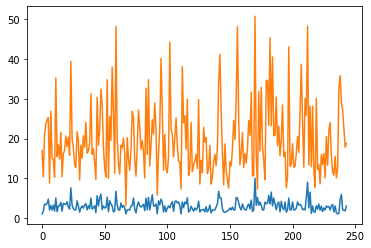

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df.tip)
plt.plot(df.total_bill)
plt.show()

# Selecionando UMA OU MAIS COLUNAS (= pd.DataFrame)

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns.svg" width=320, align="center">

Você pode, entretanto, estar interessado na seleção de mais de uma coluna. Para isso você pode simplesmente informar para o Pandas uma **lista de atributos** a serem selecionados. 

```

df [ [ <lista-de-colunas> ] ]

```

Diferentemente da seleção anterior que retorna um Série do Pandas, a seleção desse modo (uma ou mais colunas informadas em uma lista) retorna um DataFrame. **Essa é uma diferença importante que você deve entender**.

In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [ ]:
df[ ['total_bill', 'tip', 'smoker'] ]   # repare que empregamos uma lista [ ] para indicar a seleção dos atributos

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No
...,...,...,...
239,29.03,5.92,No
240,27.18,2.00,Yes
241,22.67,2.00,Yes
242,17.82,1.75,No


In [ ]:
df[['total_bill', 'tip', 'smoker']].mean()

total_bill    19.785943
tip            2.998279
dtype: float64

Por exemplo, se você estiver interessado em explorar os valores de conta e gorjetas com relação somente sobre o habito de fumar ou não fumar, você pode simplesmente selecionar:

In [ ]:
tips_fumantes = df[['total_bill', 'tip', 'smoker']]   
tips_fumantes.head()                                                         

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No


In [ ]:
type(tips_fumantes)

pandas.core.frame.DataFrame

In [ ]:
tips_fumantes.describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


Note que a seleção de **um único atributo a partir de uma lista** produz um DataFrame, enquanto a partir **somente do nome** do produz uma Série do Pandas. Repare a diferença das duas estruturas.

In [ ]:
tip_DataFrame = df[ ['tip'] ]
print( type(tip_DataFrame) )
print( tip_DataFrame )


<class 'pandas.core.frame.DataFrame'>
      tip
0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
..    ...
239  5.92
240  2.00
241  2.00
242  1.75
243  3.00

[244 rows x 1 columns]


In [ ]:
tip_Series = df['tip']
print( type(tip_Series) )
print( tip_Series )

<class 'pandas.core.series.Series'>
0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


E algumas operações são específicas para DataFrames, não sendo portanto aplicáveis a Séries, enquanto outras são específicas para Séries do Pandas.

In [ ]:
print( tip_DataFrame.info() )             # info() é um método só para DataFrames  
try:
  print( tip_Series.info() )
except AttributeError as err:
  print('Handling run-time error:', err) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tip     244 non-null    float64
dtypes: float64(1)
memory usage: 2.0 KB
None
Handling run-time error: 'Series' object has no attribute 'info'


In [ ]:
print( tip_Series.to_list() )            # to_list() é um método só para Series
try:
  print( tip_DataFrame.to_list() )
except AttributeError as err:
  print('Handling run-time error:', err)

Handling run-time error: 'DataFrame' object has no attribute 'to_list'


**Dica** Para um único atributo, de forma geral, empregue a seleção de `pd.Series` quando estiver interessado apenas em selecionar um atributo e a seleção `pd.DataFrame` quando essa seleção será empregada para criação de outros conjuntos de dados (merge de tabelas, novos conjuntos de dados etc.).

# Selecionar Linhas 

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg" width=320, align="center">

A seleção de linhas é mais interessante por que podemos especificar condições para os valores que buscamos. Por exemplo, você poderia indicar o tipo de peças que deseja ver em um DataFrame com dados de vários componentes, ou indicar a cidade das unidades de fábrica que você tem os dados de produção.

Seu critério de seleção é um predicado lógico e você deve empregar a seguinte sintaxe: 

```
df [ <critério de seleção> ]
```

Exemplos

```
df [ nome_coluna == valor ]
df [ nome_coluna != valor ]
df [ nome_coluna > valor ]
```

Assim, podemos selecionar os dados somente dos não fumantes,

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'No' ]

,total_bill,tip,smoker
0,16.99,1.01,No
1,10.34,1.66,No
2,21.01,3.50,No
3,23.68,3.31,No
4,24.59,3.61,No
...,...,...,...
235,10.07,1.25,No
238,35.83,4.67,No
239,29.03,5.92,No
242,17.82,1.75,No


Ou somente dos fumantes,

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'Yes' ]

,total_bill,tip,smoker
56,38.01,3.00,Yes
58,11.24,1.76,Yes
60,20.29,3.21,Yes
61,13.81,2.00,Yes
62,11.02,1.98,Yes
...,...,...,...
234,15.53,3.00,Yes
236,12.60,1.00,Yes
237,32.83,1.17,Yes
240,27.18,2.00,Yes


E podemos com isso já responder algumas questões interessantes que envolvem a proporção dos dados de fumantes e não fumantes.

### Qual o percental de fumantes nos nossos dados?

In [ ]:
len( tips_fumantes[ tips_fumantes.smoker == 'Yes' ] ) / len( tips_fumantes )

0.38114754098360654

# Seleção de Linhas e Colunas

<img src="https://pandas.pydata.org/docs/_images/03_subset_columns_rows.svg" width=320, align="center">

O uso mais geral é quando fazemos seleções de linhas e colunas dos dados, e às vezes nos referimos a esse Sub Conjunto dos Dados de *Slice* (Fatia dos Dados).

A boa prática indica que sempre faremos primeiro a seleção das linhas,

```
df [ <critério de seleção> ] ...

...Selecionando uma coluna
df [ <critério de seleção> ].nome_coluna                  pd.Series
df [ <critério de seleção> ]['nome_coluna']

...Selecionando uma ou mais colunas
df [ <critério de seleção> ][ [<lista-de-colunas>] ]      pd.DataFrame

```


Com isso nossa análise pode fazer muito mais perguntas, que não só sobre o total dos dados e suas proporções.

### Fumantes pagam mais gorjeta ou total de contas (em média) que não fumantes? 

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'Yes' ]['tip'].mean()  

3.008709677419355

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'No' ]['tip'].mean()

2.9918543046357624

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'Yes' ].total_bill.mean()

20.756344086021507

In [ ]:
tips_fumantes[ tips_fumantes.smoker == 'No' ].total_bill.mean()

19.18827814569537

### Exercício. Tente você. Qual a diferença percentual do valor de conta pago por fumantes e não fumantes?

0.0817199921962728

### Exercício. Tente você. Quem em média paga mais gorjetas, homens ou mulheres?

**Dica** Empregue aqui o DataFrame original, pois tips_fumantes` não tem o atributo `sex` para seleção.

2.833448275862069

3.0896178343949052

# AND, OR, NOT Conditions em Pandas

Para combinar critérios de seleção você pode empregar os operadores lógicos `&` (AND), '|' (OR) ou '!' (NOT), sendo necessário a inclusão de parênteses nas seleções. 

In [ ]:
df[ (df.sex == 'Male') & (df.smoker == 'Yes') ]

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2
63,18.29,3.76,Male,Yes,Sat,Dinner,4
69,15.01,2.09,Male,Yes,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
83,32.68,5.00,Male,Yes,Thur,Lunch,2


E ainda pode ser útil o operador `.isin()` que verifica a pertinência de um valor a uma lista,

In [ ]:
df[ (df.sex == 'Male') & (df.day.isin(['Sat','Sun'])) ]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


# Exercícios

## Q0. Considere nossa base exemplo Tips. Considerando somente os finais de semana, quem tem média de participantes na mesa maior, fumantes ou não fumantes?



## Exercício: **CASE Insurance** 

Acesse a base de dados http://meusite.mackenzie.br/rogerio/data_load/insurance.csv para as questões a seguir.

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Q1. Qual percentual de homens e mulheres assegurados na base? 

## Q2. Qual o total dos valor de seguros pago por homens e mulheres segurados na base? 

## Q3. Qual o precentual de valor de seguros pagos por homens e mulheres segurados na base? 

## Q4. Não fumantes apresentam em média mais filhos? 

## Q5. Qual a média e maior de idade dentre os segurados homem, das regiões northwest ou northeast?



## Exercício: **CASE:** **European Energy:** 

Qual o tipo de Energia mais produzido na Europa? O uso de fontes renováveis já é significativo? 

[European Energy link](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-08-04/readme.md)

Explore aqui como é a produção de Energia na Europa empregando a base de dados abaixo. Você pode achar útil fazer uma exploração inicial dos dados antes de começar.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv') 

df.head()

,country,country_name,type,level,2016,2017,2018
0,BE,Belgium,Conventional thermal,Level 1,30728.0,31316.0,30092.635
1,BE,Belgium,Nuclear,Level 1,41430.0,40128.5,26995.628
2,BE,Belgium,Hydro,Level 1,1476.0,1360.9,1239.248
3,BE,Belgium,Pumped hydro power,Level 2,1110.0,1093.2,983.190
4,BE,Belgium,Wind,Level 1,5340.0,6387.9,7177.346


## Q6. Quantos tipos de energia e países diferentes há na base?

## Q7. Qual o percentual de energia nuclear produzido na Europa no ano de 2018?

## Q8. Qual o percentual de energia nuclear produzido na França no ano de 2018?

## Q9. Qual o percentual de energias limpas produzida na Europa no ano de 2018?

*Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.*

## Q10. Considerando os anos de 2016, 2017 e 2018, a produção de energias limpas tem aumentado na Europa? Verifique em termos absolutos e percentuais.

*Energias limpas somente Hidroelétrica, Eólica, Solar e Geotérmica.*